# **<font>Intro to Exploratory Data Analysis By Python | مقدمة لتحليل البيانات الاستكشافي بلغة بايثون </font>**

<img src="https://fihm.ai/wp-content/uploads/2021/10/eda-2048x1365.jpg" alt="Image" height="400" width="700">

In [1]:
# استيراد المكتبات 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# مسار الملف
file_path = 'data/StudentsPerformance.csv'
# سحب البيانات وتحويلها إلى إطار بيانات
df = pd.read_csv(file_path) 
# استعراض أول 10 صفوف
df.head(10) 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
# أبعاد البيانات 
data_dimensions = df.shape 

# طباعة الأبعاد
print(f"The Dimensions of the dataset: {data_dimensions}") 
 # طباعة عدد الصفوف فقط
print(f"The number of rows: {data_dimensions[0]}")
 # طباعة عدد الأعمدة فقط
print(f"The number of columns: {data_dimensions[1]}")

The Dimensions of the dataset: (1000, 8)
The number of rows: 1000
The number of columns: 8


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
# لشمل الميزات الفئوية include='all' تم تمرير المعامل 
df.describe(include='all') 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [6]:
# إيجاد مجموع القيم المفقودة في كل الميزات
df.isnull().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# عدد الذكور الذين ارتادوا الاختبار
males_count = df['gender'][df['gender'] == 'male'].value_counts()

# عدد الإناث اللواتي ارتدن الاختبار
females_count = df['gender'][df['gender'] == 'female'].value_counts()

# طباعة أعداد الطلبة
print("عدد الطلاب الذين ارتادوا الاختبار  : ", males_count[0])
print("عدد الطالبات اللواتي ارتدن الاختبار : ", females_count[0])

عدد الطلاب الذين ارتادوا الاختبار  :  482
عدد الطالبات اللواتي ارتدن الاختبار :  518


(array([0, 1]), <a list of 2 Text xticklabel objects>)

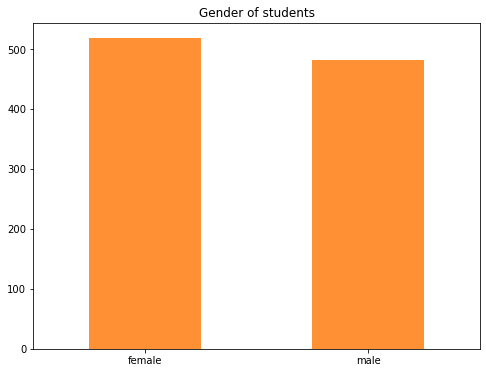

In [8]:
 # تهيئة مساحة للرسم البياني
plt.subplot()

# Bar Plot رسم بياني من نوع  
df['gender'].value_counts().plot(kind='bar', title='Gender of students',
                                 figsize=(8,6), color='#FF9034') 

# x اتجاه النصوص على المحور
plt.xticks(rotation=0)  

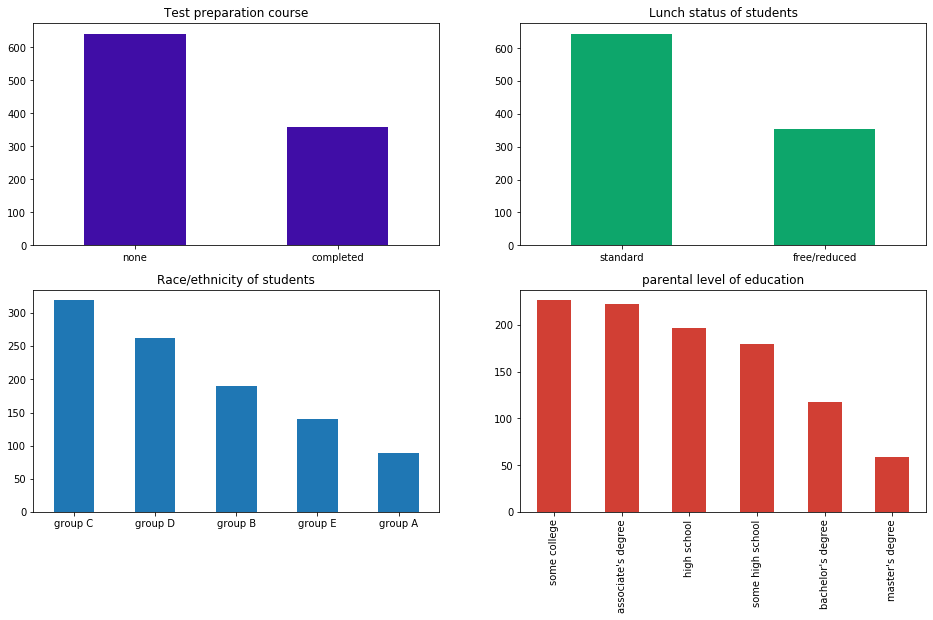

In [9]:
#الرسم البياني 1: مقارنة بين الطلاب المتمين و غير الحاصلين على لدورة الاستعداد 
plt.subplot(2,2,1)  

df['test preparation course'].value_counts().plot(kind='bar', 
                                                  title='Test preparation course', 
                                                  figsize=(16,9), color='#400da6')
plt.xticks(rotation=0)


#الرسم البياني 2: وصف لأنواع الوجبات التي تناولها الطلاب
plt.subplot(2,2,2)

df['lunch'].value_counts().plot(kind='bar', 
                                title='Lunch status of students', 
                                figsize=(16,9), color='#0da66b')

plt.xticks(rotation=0)

#الرسم البياني 3: مقارنة بين أعداد الطلاب وفقًا للعرق
plt.subplot(2,2,3)
df['race/ethnicity'].value_counts().plot(kind='bar', 
                                         title='Race/ethnicity of students',
                                         figsize=(16,9))
plt.xticks(rotation=0)


#الرسم البياتي 4: المستوى التعليمي للوالدين
plt.subplot(2,2,4)

df['parental level of education'].value_counts().plot(kind='bar', 
                                               title='parental level of education', 
                                               figsize=(16,9) , color='#d13f34')
plt.xticks(rotation=90)



#إظهار جميع الرسومات 
plt.show()

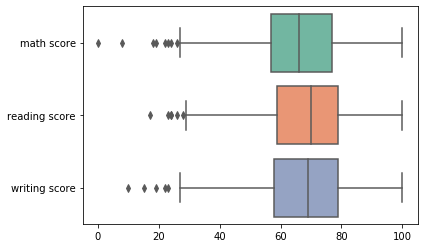

In [10]:
# Box Plot الرسم البياني الصندوقي 
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [11]:
# دراسة العلاقات بين الميزات الرقمية
corr = df.corr()
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


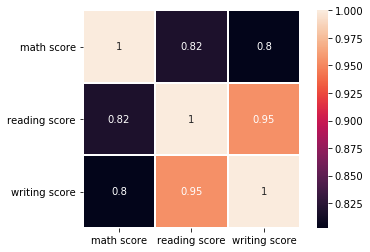

In [12]:
# دراسة العلاقات بين الميزات الرقمية
corr = df.corr()

# رسم الخريطة الحرارية من خلال المتغير أعلاه
sns.heatmap(corr, annot=True, square=True, linewidths=.7)

plt.yticks(rotation=0)

plt.show()

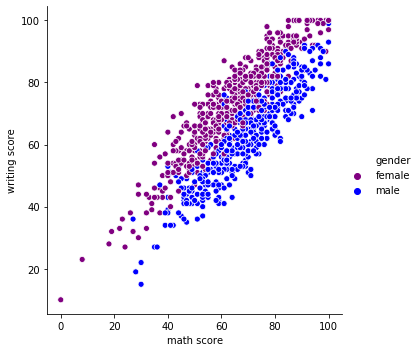

In [13]:
# التحقق من وجود علاقة بين قسم الرياضيات وقسم الكتابة
sns.relplot(x='math score', y='writing score', 
            hue='gender', 
            data=df, 
            palette=["purple", "blue"])


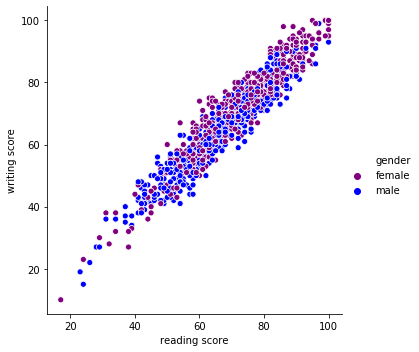

In [15]:
# التحقق من وجود علاقة بين قسم القراءة وقسم الكتابة
sns.relplot(x='reading score', y='writing score', 
            hue='gender', 
            data=df, 
            palette=["purple", "blue"])


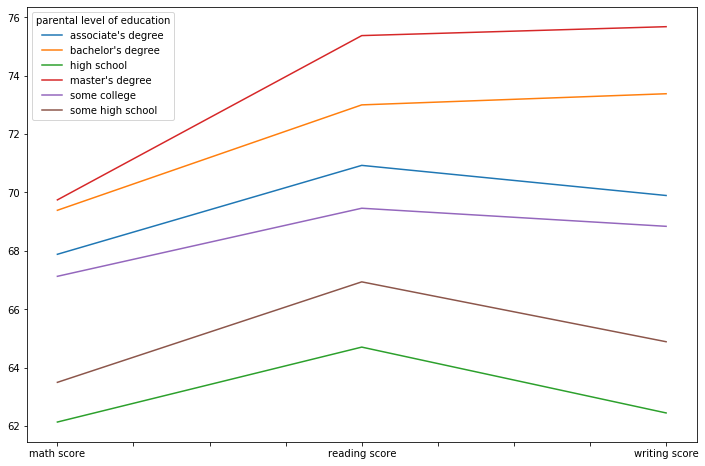

In [16]:
# رسم بياني يبين العلاقة بين مستوى الطلاب و مستوى تعليم الآباء
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12,8))

In [17]:
# درجة النجاح
Pass_Mark = 60

# إحصاء عدد الطلاب والطالبات الناجحون في قسم الرياضيات
df['Math_Section_Status'] = np.where(df['math score']<Pass_Mark, 'Fail', 'Pass')
df.Math_Section_Status.value_counts()

Pass    677
Fail    323
Name: Math_Section_Status, dtype: int64

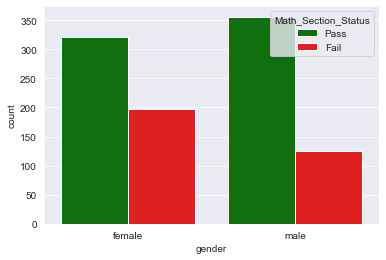

In [18]:
#  رسم بياني يقارن نسبة النجاح والرسوب في قسم الرياضيات بين الطلاب والطالبات 
sns.set_style("darkgrid")
ax = sns.countplot(x='gender', 
                   data = df, 
                   hue='Math_Section_Status',
                   palette= ['green', 'red'])

### <div style="text-align: right"> منصة فِهم لعلوم الذكاء الإصطناعي 2021  </div>
#### <div style="text-align: right">إعداد : محمد عثمان</div>

 
